In [ ]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Project /Expanded_data_with_more_features.csv')

In [ ]:
raw_data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [ ]:
# Some information about the data we will use
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
# We check whether there are duplicate rows
# There are no duplicate rows because every index corresponds to False

duplicate_rows = raw_data.duplicated()
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
30636    False
30637    False
30638    False
30639    False
30640    False
Length: 30641, dtype: bool

In [ ]:
# We generate new colum  where we collected three marks and divided them by their number
raw_data['Avg'] = (raw_data['WritingScore'] + raw_data['ReadingScore'] + raw_data['MathScore']) / 3

In [ ]:
raw_data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Avg
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,61.666667
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.000000
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.000000
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.333333


In [ ]:
cleanData=raw_data.drop({"TestPrep","EthnicGroup","NrSiblings","Unnamed: 0","TransportMeans", "IsFirstChild","Gender", "ParentMaritalStatus",},axis =1 )
cleanData

,ParentEduc,LunchType,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore,Avg
0,bachelor's degree,standard,regularly,< 5,71,71,74,72.000000
1,some college,standard,sometimes,5 - 10,69,90,88,82.333333
2,master's degree,standard,sometimes,< 5,87,93,91,90.333333
3,associate's degree,free/reduced,never,5 - 10,45,56,42,47.666667
4,some college,standard,sometimes,5 - 10,76,78,75,76.333333
...,...,...,...,...,...,...,...,...
30636,high school,standard,sometimes,5 - 10,59,61,65,61.666667
30637,high school,standard,regularly,5 - 10,58,53,51,54.000000
30638,high school,free/reduced,sometimes,5 - 10,61,70,67,66.000000
30639,associate's degree,standard,regularly,5 - 10,82,90,93,88.333333


**We now start cleaning the data**

In [ ]:
# This is the number of columns and rows before cleaning the data
cleanData.shape

(30641, 8)

In [ ]:
# We check if there are outliers in the AVG column using Inter-quarile Range (IQR)
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

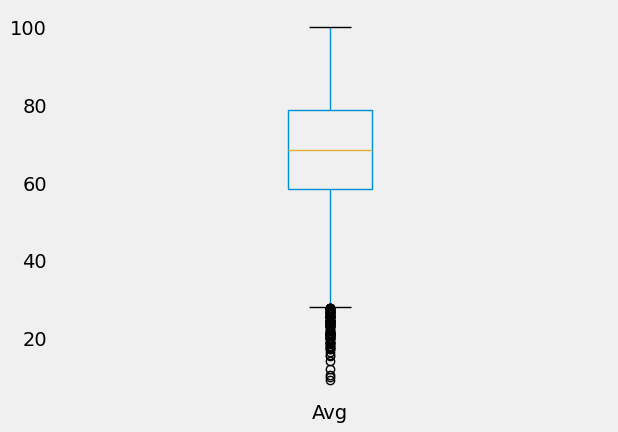

In [ ]:
# As is clear, there are outliers from the plot
plot_boxplot(cleanData,"Avg")

Remove outliers

In [ ]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[(df[ft] <  lower_bound) | (df[ft] > upper_bound ) ]

  return ls


In [ ]:
# Outliers index
index_list = []
for Avg in ['Avg']:
  index_list.extend(outliers(cleanData ,Avg))

In [ ]:
index_list

[17,
 55,
 69,
 308,
 565,
 928,
 1297,
 1484,
 2984,
 3197,
 3283,
 4052,
 4232,
 4245,
 4260,
 4622,
 4719,
 4886,
 5084,
 5174,
 5263,
 5641,
 5703,
 6408,
 6892,
 7423,
 7440,
 7553,
 8373,
 8439,
 8459,
 8559,
 9046,
 9268,
 10164,
 10295,
 11333,
 12731,
 12748,
 12789,
 13821,
 13846,
 13933,
 13980,
 14274,
 14494,
 14708,
 15653,
 16326,
 17238,
 17399,
 17540,
 17924,
 18385,
 18432,
 18862,
 19630,
 19688,
 19998,
 20009,
 20127,
 20249,
 20554,
 20603,
 20860,
 20983,
 21062,
 21069,
 21119,
 21287,
 21462,
 21477,
 21579,
 22098,
 22153,
 22450,
 22680,
 23129,
 23217,
 23373,
 23518,
 23857,
 23932,
 24548,
 25541,
 25725,
 25785,
 26048,
 26373,
 26612,
 26792,
 27065,
 27218,
 27323,
 27581,
 27598,
 27765,
 28155,
 28597,
 28687,
 28698,
 29000,
 30389,
 30478]

In [ ]:
def remove(df ,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df


In [ ]:
cleanData2 = remove(cleanData, index_list)

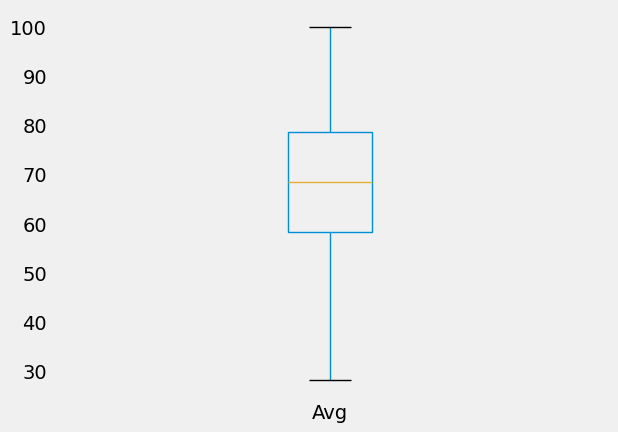

In [ ]:
# As is clear, all outliers have been removed
plot_boxplot(cleanData2 ,'Avg')

In [ ]:
# To be more sure, we used the method again, and as we can see, the number of rows decreased significantly
cleanData2.shape

(30537, 8)

In [ ]:
cleanData2

,ParentEduc,LunchType,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore,Avg
0,bachelor's degree,standard,regularly,< 5,71,71,74,72.000000
1,some college,standard,sometimes,5 - 10,69,90,88,82.333333
2,master's degree,standard,sometimes,< 5,87,93,91,90.333333
3,associate's degree,free/reduced,never,5 - 10,45,56,42,47.666667
4,some college,standard,sometimes,5 - 10,76,78,75,76.333333
...,...,...,...,...,...,...,...,...
30636,high school,standard,sometimes,5 - 10,59,61,65,61.666667
30637,high school,standard,regularly,5 - 10,58,53,51,54.000000
30638,high school,free/reduced,sometimes,5 - 10,61,70,67,66.000000
30639,associate's degree,standard,regularly,5 - 10,82,90,93,88.333333


In [ ]:
# We check if there are missing values ​​using the info() method.
cleanData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30537 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ParentEduc      28696 non-null  object 
 1   LunchType       30537 non-null  object 
 2   PracticeSport   29906 non-null  object 
 3   WklyStudyHours  29586 non-null  object 
 4   MathScore       30537 non-null  int64  
 5   ReadingScore    30537 non-null  int64  
 6   WritingScore    30537 non-null  int64  
 7   Avg             30537 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
# To be more specific, we used this method to determine the missing values ​​in each column
cleanData2.isna().sum()

ParentEduc        1841
LunchType            0
PracticeSport      631
WklyStudyHours     951
MathScore            0
ReadingScore         0
WritingScore         0
Avg                  0
dtype: int64

In [ ]:
# We deleted missing values
cleanData2.dropna(inplace=True)
cleanData2.isna().sum()

ParentEduc        0
LunchType         0
PracticeSport     0
WklyStudyHours    0
MathScore         0
ReadingScore      0
WritingScore      0
Avg               0
dtype: int64

In [ ]:
# We finished cleaning and all missing values ​​were dealt with
cleanData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27243 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ParentEduc      27243 non-null  object 
 1   LunchType       27243 non-null  object 
 2   PracticeSport   27243 non-null  object 
 3   WklyStudyHours  27243 non-null  object 
 4   MathScore       27243 non-null  int64  
 5   ReadingScore    27243 non-null  int64  
 6   WritingScore    27243 non-null  int64  
 7   Avg             27243 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.9+ MB


In [ ]:
# Summery statistics
cleanData2.describe()

,MathScore,ReadingScore,WritingScore,Avg
count,27243.000000,27243.000000,27243.000000,27243.000000
mean,66.717138,69.550967,68.589619,68.285908
std,15.176729,14.538931,15.223196,14.235511
min,12.000000,22.000000,22.000000,28.000000
25%,56.000000,59.000000,58.000000,58.333333
50%,67.000000,70.000000,69.000000,68.333333
75%,78.000000,80.000000,79.000000,78.666667
max,100.000000,100.000000,100.000000,100.000000


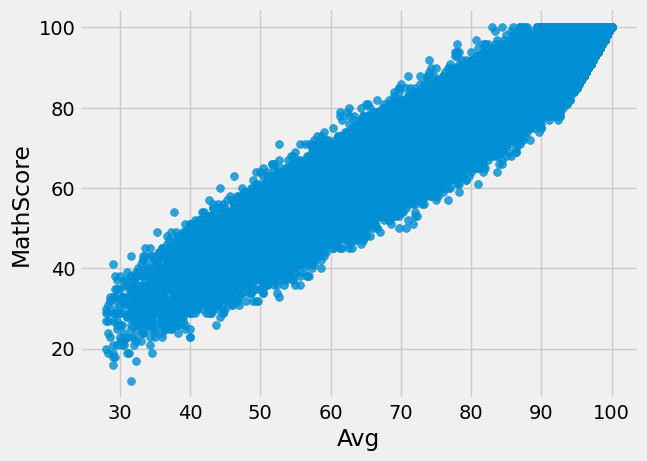

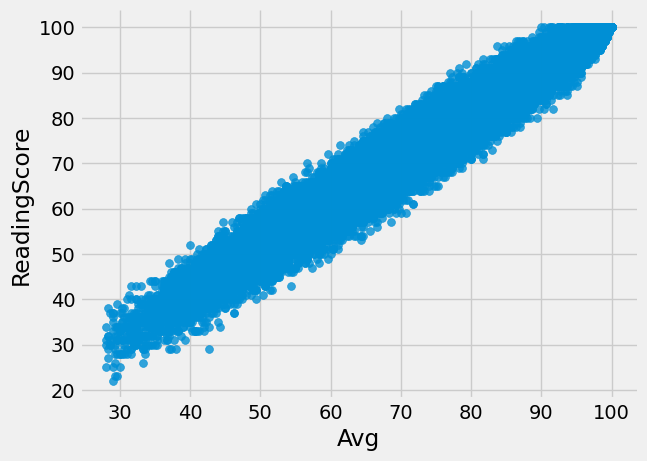

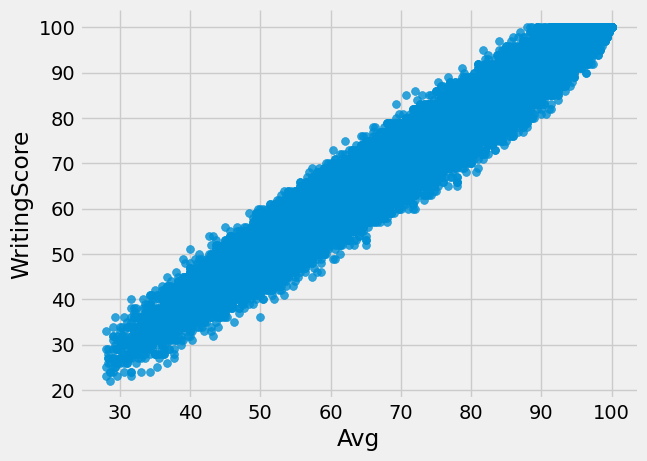

In [ ]:
# Representing scores columns with average

cleanData2.plot(kind='scatter', x='Avg', y='MathScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


cleanData2.plot(kind='scatter', x='Avg', y='ReadingScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


cleanData2.plot(kind='scatter', x='Avg', y='WritingScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**categorical data representation with statistical information**

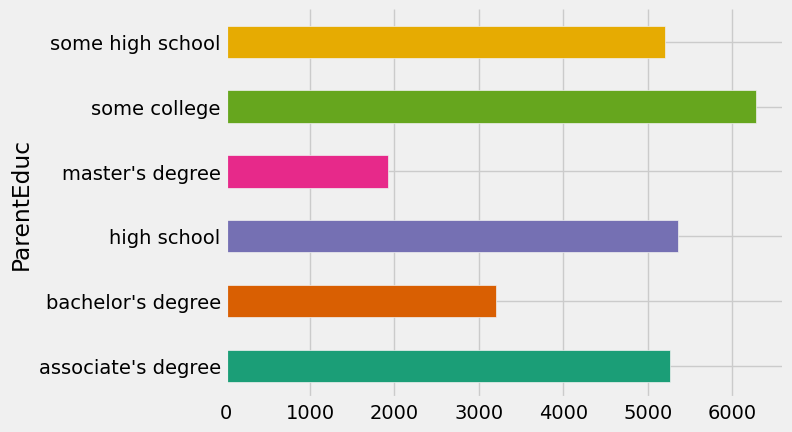

In [ ]:
cleanData2.groupby('ParentEduc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Number of repetitions
value_counts1 = cleanData2['ParentEduc'].value_counts()

# Calculate percentages of values ​​in the column
total_count1 = len(cleanData2)
percentages = {}
for value in value_counts1.index:
    count = value_counts1[value]
    percentage = (count / total_count1) * 100
    percentages[value] = percentage

# Print percentages of values
for value, percentage in percentages.items():
    print(f"{value}: {percentage}%")

some college: 23.055463788863197%
high school: 19.689461513049224%
associate's degree: 19.333406746687224%
some high school: 19.091142678853284%
bachelor's degree: 11.749807289946041%
master's degree: 7.080717982601035%


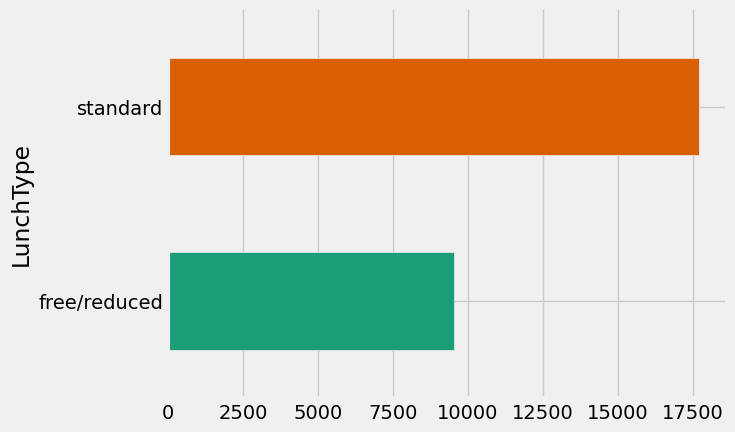

In [ ]:
cleanData2.groupby('LunchType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Number of repetitions
value_counts2 = cleanData2['LunchType'].value_counts()

# Calculate percentages of values ​​in the column
total_count2 = len(cleanData2)
percentages = {}
for value in value_counts2.index:
    count = value_counts2[value]
    percentage = (count / total_count2) * 100
    percentages[value] = percentage

# Print percentages of values
for value, percentage in percentages.items():
    print(f"{value}: {percentage}%")

standard: 64.95613552105128%
free/reduced: 35.04386447894872%


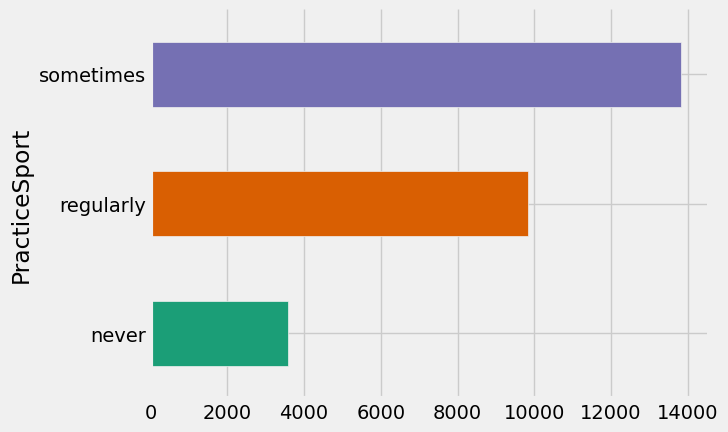

In [ ]:
cleanData2.groupby('PracticeSport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Number of repetitions
value_counts3 = cleanData2['PracticeSport'].value_counts()

# Calculate percentages of values ​​in the column
total_count3 = len(cleanData2)
percentages = {}
for value in value_counts3.index:
    count = value_counts3[value]
    percentage = (count / total_count3) * 100
    percentages[value] = percentage

# Print percentages of values
for value, percentage in percentages.items():
    print(f"{value}: {percentage}%")

sometimes: 50.72862753734905%
regularly: 36.090004771868%
never: 13.181367690782952%


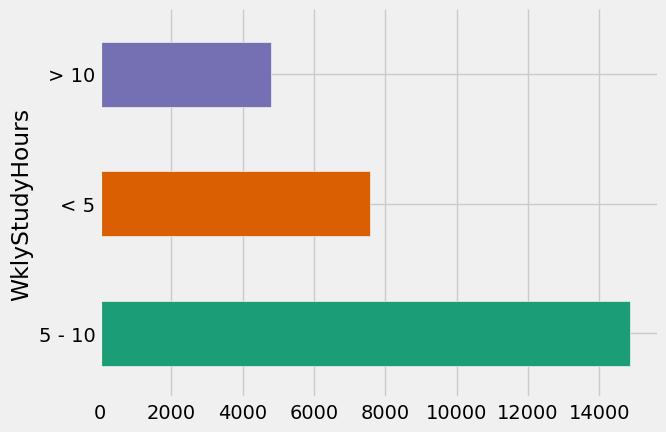

In [ ]:

cleanData2.groupby('WklyStudyHours').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Number of repetitions
value_counts4 = cleanData2['WklyStudyHours'].value_counts()

# Calculate percentages of values ​​in the column
total_count4 = len(cleanData2)
percentages = {}
for value in value_counts4.index:
    count = value_counts4[value]
    percentage = (count / total_count4) * 100
    percentages[value] = percentage

# Print percentages of values
for value, percentage in percentages.items():
    print(f"{value}: {percentage}%")

5 - 10: 54.60852329038652%
< 5: 27.838343794736264%
> 10: 17.553132914877217%


**In order to clean the data and use some special methods, we used the package and other libraries such as pandas and others. Once we finished cleaning, we saved the cleaned data as a new file in order to use the datascience package.**

In [ ]:
# The method we used to save the file
cleanData2.to_csv('cleaned_data.csv', index=False)

In [ ]:
cleanData2=Table.read_table('/content/cleaned_data.csv')

In [ ]:
cleanData2

ParentEduc,LunchType,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore,Avg
bachelor's degree,standard,regularly,< 5,71,71,74,72
some college,standard,sometimes,5 - 10,69,90,88,82.3333
master's degree,standard,sometimes,< 5,87,93,91,90.3333
associate's degree,free/reduced,never,5 - 10,45,56,42,47.6667
some college,standard,sometimes,5 - 10,76,78,75,76.3333
associate's degree,standard,regularly,5 - 10,73,84,79,78.6667
some college,standard,never,5 - 10,85,93,89,89
some college,free/reduced,sometimes,> 10,41,43,39,41
high school,free/reduced,sometimes,> 10,65,64,68,65.6667
high school,free/reduced,regularly,< 5,37,59,50,48.6667


In [ ]:
print('The number of rows in this table: ' + str(cleanData2.num_rows))
print('The number of rows in this table: ' + str(cleanData2.num_columns))
print('labels covered by this table: ' + str(cleanData2.labels))


The number of rows in this table: 27243
The number of rows in this table: 8
labels covered by this table: ('ParentEduc', 'LunchType', 'PracticeSport', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'Avg')


In [ ]:
selected_columns=cleanData2.select('LunchType', 'PracticeSport', 'WklyStudyHours', 'Avg')

In [ ]:
selected_columns

LunchType,PracticeSport,WklyStudyHours,Avg
standard,regularly,< 5,72
standard,sometimes,5 - 10,82.3333
standard,sometimes,< 5,90.3333
free/reduced,never,5 - 10,47.6667
standard,sometimes,5 - 10,76.3333
standard,regularly,5 - 10,78.6667
standard,never,5 - 10,89
free/reduced,sometimes,> 10,41
free/reduced,sometimes,> 10,65.6667
free/reduced,regularly,< 5,48.6667


**We represented the selected columns with the AVG column to find out the most influential factors in raising the average grades of students**

**After analyzing the most important factors affecting average grades, we created a method that categorize students’ data**

In [ ]:
# Define a function to check the conditions to categorize students’ data in column WklyStudyHours into 1 for > 10, 2 for 5 - 10, 3 for < 5
def categorize_new_column(row):
    study_hours = row.item("WklyStudyHours")

    if (study_hours == "> 10"):
        return 1

    elif (study_hours == "5 - 10"):
        return 2

    elif (study_hours == "< 5"):
        return 3


# Apply the function to create a new column with the results
study_hours_columns = selected_columns.with_column('study_hours_cases', selected_columns.apply(categorize_new_column))

In [ ]:
#selact the columns we want to sort and plot
study_hours_selected_columns=study_hours_columns.select('study_hours_cases', 'Avg')

In [ ]:
#sort Avg column
Avg_sorted_columns = study_hours_selected_columns.sort('Avg', descending=True)

In [ ]:
#sort the sorted column by study_hours_cases
study_hours_sorted_columns = Avg_sorted_columns.sort('study_hours_cases')

In [ ]:
study_hours_sorted_columns.num_rows

27243

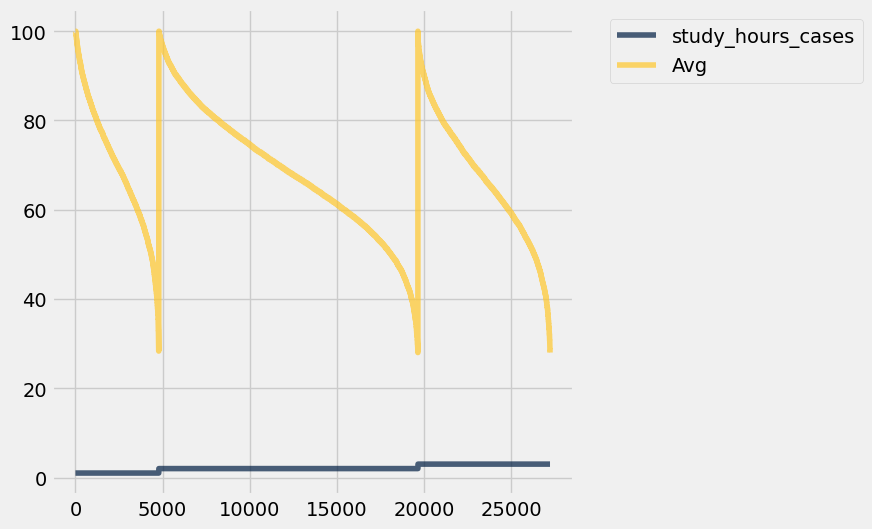

In [ ]:
study_hours_sorted_columns.plot()

In [ ]:
# Define a function to check the conditions to categorize students’ data in column LunchType into 1 for standard, 2 for free/reduced
def categorize_new_column(row):
    Lunch_Type = row.item("LunchType")

    if (Lunch_Type == "standard"):
        return 1

    elif (Lunch_Type == "free/reduced"):
        return 2

# Apply the function to create a new column with the results
Lunch_Type_columns = selected_columns.with_column('Lunch_Type_cases', selected_columns.apply(categorize_new_column))

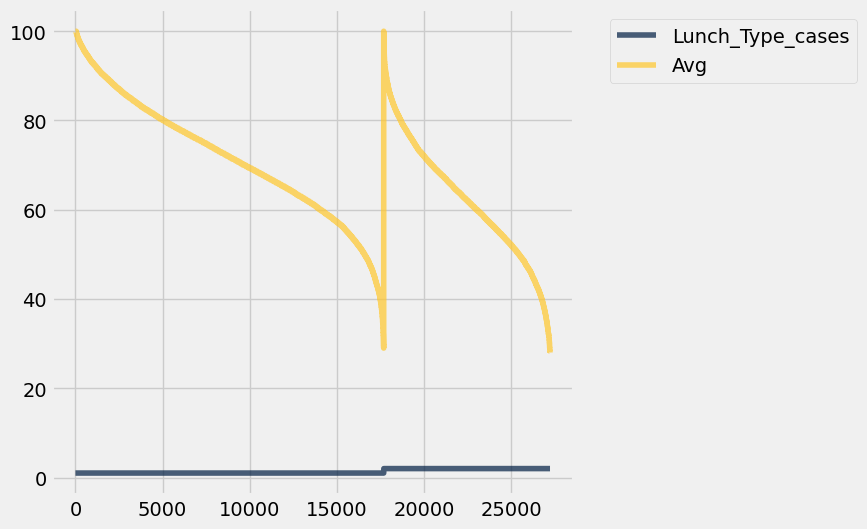

In [ ]:
#selact the columns we want to sort and plot
Lunch_Type_selected_columns=Lunch_Type_columns.select('Lunch_Type_cases', 'Avg')
#sort Avg column
Avg_sorted_columns = Lunch_Type_selected_columns.sort('Avg', descending=True)
#sort the sorted column by Lunch_Type_cases
Lunch_Type_sorted_columns = Avg_sorted_columns.sort('Lunch_Type_cases')

Lunch_Type_sorted_columns.plot()

In [ ]:
# Define a function to check the conditions to categorize students’ data in column PracticeSport into 1 for regularly, 2 for sometimes, 3 for never
def categorize_new_column(row):
    Practice_Sport = row.item("PracticeSport")

    if (Practice_Sport == "regularly"):
        return 1

    elif (Practice_Sport == "sometimes"):
        return 2

    elif (Practice_Sport == "never"):
        return 3

# Apply the function to create a new column with the results
Practice_Sport_columns = selected_columns.with_column('Practice_Sport_cases', selected_columns.apply(categorize_new_column))

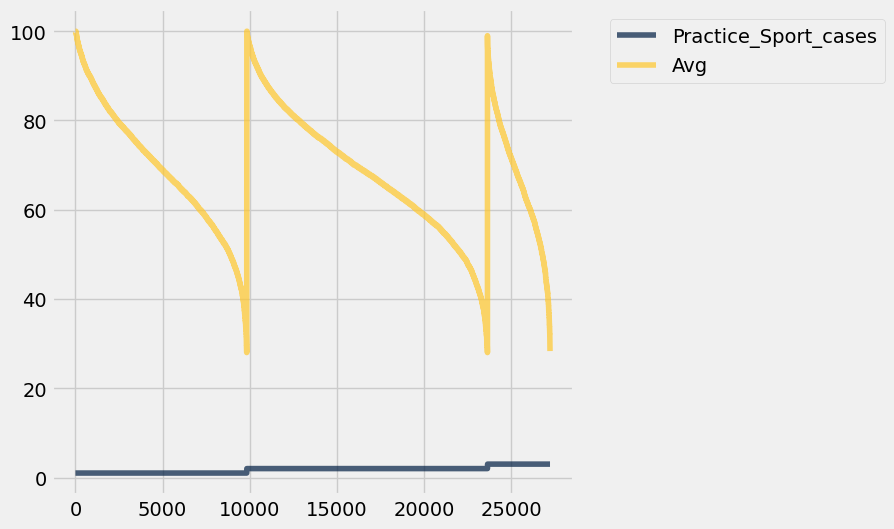

In [ ]:
#selact the columns we want to sort and plot
Practice_Sport_selected_columns=Practice_Sport_columns.select('Practice_Sport_cases', 'Avg')
#sort Avg column
Avg_sorted_columns = Practice_Sport_selected_columns.sort('Avg', descending=True)
#sort the sorted column by Practice_Sport_cases
Practice_Sport_sorted_columns = Avg_sorted_columns.sort('Practice_Sport_cases')

Practice_Sport_sorted_columns.plot()